In [1]:
from pillow_heif import register_heif_opener
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [59]:
# Registrar HEIF en Pillow
# Habilitar el soporte para imágenes en formato HEIF/HEIC en Pillow
register_heif_opener() #función

# Directorio donde están tus imágenes
base_dir = "/Users/astro/Desktop/PCD/Capítulo 4"
folders = ["Shelby", "Perico", "Robot"]  # Nombres de las carpetas

image_matrices = []  # Lista para guardar las imágenes como matrices numpy
labels = []          # Lista para guardar las etiquetas correspondientes

In [60]:
# Procesar imágenes en todas las carpetas
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    for image_file in os.listdir(folder_path):
        if image_file.endswith(".heic"):  # Filtrar por imágenes HEIC
            # Cargar la imagen
            image_path = os.path.join(folder_path, image_file)
            image = Image.open(image_path)

            # Redimensionar la imagen
            image = image.resize((128, 128))  # Cambia al tamaño que necesites

            # Convertir la imagen a escala de grises
            image_gray = image.convert("L")
            
            # Convertir la imagen a una matriz numpy
            pixel_matrix = np.array(image_gray) # Captura los vectores en el momento
            image_matrices.append(pixel_matrix) # Captura los vectores de manera acumulada

            # Guardar la etiqueta de la carpeta
            labels.append(folder)

# Convertir las listas a arrays de NumPy
image_matrices = np.array(image_matrices)
labels = np.array(labels)

print(f"Se procesaron {len(image_matrices)} imágenes.")

Se procesaron 167 imágenes.


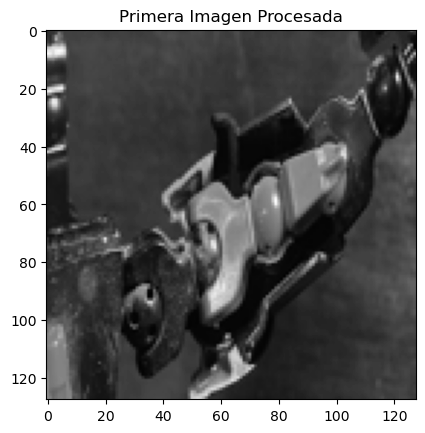

In [61]:
plt.imshow(image_matrices[166], cmap='gray')  # `cmap='gray'` si es escala de grises
plt.title("Primera Imagen Procesada")
plt.show()

In [62]:
train_images, test_images, train_labels, test_labels = train_test_split(image_matrices, labels, test_size = 0.2, random_state = 42)# Escalamos para converger más rápido, por ello dividimos entre 255 (el número más alto en escala de grises)

# Asegurar que las imágenes tengan la dimensión correcta (número de muestras, alto, ancho, canales)
train_images = train_images.reshape(train_images.shape[0], 128, 128, 1)  
test_images = test_images.reshape(test_images.shape[0], 128, 128, 1)

# Convertir a float32 para normalizar después
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

#El 1 se lo agregamos para especificar el canal de escala grises. Aunque en un inicio ya lo habíamos definido.
#Tensorflow espera una entrada de 4 dimensiones.

# Las etiquetas están en cadenas texto, hay que convertirlas a enteros
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

#Categorización
n_classes = len(np.unique(labels))
train_labels = to_categorical(train_labels_encoded, n_classes)
test_labels = to_categorical(test_labels_encoded, n_classes)

In [109]:
train_labels

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [102]:
model = models.Sequential([
        # Primera capa convolucional
        layers.Conv2D( # Capa de entrada
        32, (3, 3), # Aplica 32 filtros de 3 × 3
        activation='relu', # 2. Aplica función de activación ReLU
        input_shape=(128, 128, 1) # 1. Recibe imágenes de 128 × 128 en formato escala grises
    ),
    layers.MaxPooling2D((2, 2)), # Reducción de dimensionalidad a 2 × 2
    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filtros de 3 × 3
    layers.MaxPooling2D((2, 2)), # Reducción de dimensionalidad a 2 × 2
    # Tercera capa convolucional
    layers.Conv2D(128, (3, 3), activation='relu'), # 64 filtros de 3 × 3
    layers.MaxPooling2D((2, 2)),
    # Cuarta capa convolucional
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(), # Conversión a vector para capa densa (totalmente conectada)
    layers.Dense(256, activation='relu'), # Capa densa de 256 neuronas
    # Dropout para evitar sobreajuste
    layers.Dropout(0.6),
    layers.Dense(3, activation='softmax') # Capa de salida con una neurona por cada clase
])

model.summary()

/Users/astro/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,748,163 (10.48 MB)

 Trainable params: 2,748,163 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(
    optimizer = 'adam', # optimizador
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [104]:
history = model.fit(
    train_images, train_labels, epochs = 20,  batch_size=32,
    validation_data = (test_images, test_labels)
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.2512 - loss: 1.1428 - val_accuracy: 0.2353 - val_loss: 1.1006
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.4245 - loss: 1.0874 - val_accuracy: 0.3529 - val_loss: 1.0959
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.3562 - loss: 1.0790 - val_accuracy: 0.3529 - val_loss: 1.0845
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.3212 - loss: 1.0647 - val_accuracy: 0.3529 - val_loss: 1.0741
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.4279 - loss: 1.0686 - val_accuracy: 0.2353 - val_loss: 1.1014
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.3956 - loss: 1.0717 - val_accuracy: 0.2941 - val_loss: 1.0904
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.4754 - loss: 1.0172 - val_accuracy: 0.4706 - val_loss: 1.0612
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.5281 - loss: 0.9884 - val_accuracy: 0.6176 - val_loss:

In [105]:
imagen = Image.open("/Users/astro/Desktop/PCD/Prueba/Optimus.jpg")
imagen_gris = imagen.resize((128, 128)).convert("L") 
imagen_array = np.array(imagen_gris)

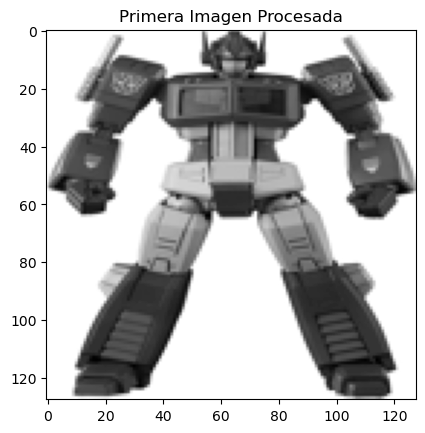

In [106]:
plt.imshow(imagen_array, cmap='gray')  # `cmap='gray'` si es escala de grises
plt.title("Primera Imagen Procesada")
plt.show()

In [107]:
imgris_array = imagen_array.reshape(1, 128, 128, 1)
imgris_array = imgris_array.astype('float32') / 255.0

In [108]:
prediccion = model.predict(imgris_array)
clase_predicha = np.argmax(prediccion, axis=1)
etiqueta = label_encoder.inverse_transform([np.argmax(prediccion)])
print(f"La clase predicha es: {etiqueta[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
La clase predicha es: Shelby
